# Decision Trees (Classification Trees) for Weather Data
Filename: decision_trees_weather.ipynb
- Load CSV file, view data, and show data description
- Convert categorical attributes to dummies
- Build decision tree model
- Draw decision tree
- Evaluate decision tree model using a holdout test set
- Evaluate decision tree model using cross validation

In [ ]:
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt
#import graphviz as gr
%matplotlib inline
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 60)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

Mounted at /content/drive


### Load CSV file, view data, and show data description

In [ ]:
import pandas as pd
import numpy as np
rawdf = pd.read_csv('/content/drive/MyDrive/MISM_6212/Code1/Data/weather.csv')
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     int64 
 2   humidity     14 non-null     int64 
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), int64(2), object(2)
memory usage: 590.0+ bytes


In [ ]:
rawdf.describe()

,temperature,humidity
count,14.000000,14.000000
mean,73.571429,81.642857
std,6.571667,10.285218
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,82.500000
75%,78.750000,90.000000
max,85.000000,96.000000


In [ ]:
print('outlook', rawdf['outlook'].unique(),
      '\nwindy', rawdf['windy'].unique(),
      '\nplay', rawdf['play'].unique())

outlook ['sunny' 'overcast' 'rainy'] 
windy [False  True] 
play ['no' 'yes']


In [ ]:
rawdf['play'].value_counts()
# rawdf.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [ ]:
rawdf

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [ ]:
rawdf.head()

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


In [ ]:
rawdf.head(3)

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes


In [ ]:
rawdf.tail(3)

,outlook,temperature,humidity,windy,play
11,overcast,72,90,True,yes
12,overcast,81,75,False,yes
13,rainy,71,91,True,no


### Convert categorical attributes to dummies

In [ ]:
# Convert binary categorical attributes to 0 and 1 
rawdf['windy'].map({'False':0, 'True':1})
# rawdf.windy = rawdf.windy.astype(int)
# rawdf['play'].map({'no':0, 'yes':1})   # also works but not necessary for class attribute
rawdf['windy'].dtypes   # will work even though windy remains a bool type

dtype('bool')

In [ ]:
# Convert categorical attributes with more than two categories to dummies

# Convert a single categorical attribute using pandas.get_dummies()
outlook_dum = pd.get_dummies(rawdf.outlook)
print('outlook_dum:\n', outlook_dum)
mergedum = pd.concat([rawdf, outlook_dum], axis='columns')
cleandf = mergedum.drop('outlook', axis='columns')
# cleandf = mergedum.drop(['outlook','sunny'], axis='columns') # then remove 'sunny' from feature_names
print('\ncleandf:')
cleandf

outlook_dum:
     overcast  rainy  sunny
0          0      0      1
1          0      0      1
2          1      0      0
3          0      1      0
4          0      1      0
5          0      1      0
6          1      0      0
7          0      0      1
8          0      0      1
9          0      1      0
10         0      0      1
11         1      0      0
12         1      0      0
13         0      1      0

cleandf:


,temperature,humidity,windy,play,overcast,rainy,sunny
0,85,85,False,no,0,0,1
1,80,90,True,no,0,0,1
2,83,86,False,yes,1,0,0
3,70,96,False,yes,0,1,0
4,68,80,False,yes,0,1,0
5,65,70,True,no,0,1,0
6,64,65,True,yes,1,0,0
7,72,95,False,no,0,0,1
8,69,70,False,yes,0,0,1
9,75,80,False,yes,0,1,0


In [ ]:
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   temperature  14 non-null     int64 
 1   humidity     14 non-null     int64 
 2   windy        14 non-null     bool  
 3   play         14 non-null     object
 4   overcast     14 non-null     uint8 
 5   rainy        14 non-null     uint8 
 6   sunny        14 non-null     uint8 
dtypes: bool(1), int64(2), object(1), uint8(3)
memory usage: 520.0+ bytes


In [ ]:
# Convert multiple categorical attributes to dummies using one hot encoding
from sklearn.preprocessing import OneHotEncoder
catdf = rawdf[['outlook','windy']]
encoder = OneHotEncoder(sparse=False)
onehot_array = encoder.fit_transform(catdf[['outlook','windy']])
onehot_array

array([[0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.]])

In [ ]:
encoder.categories_

[array(['overcast', 'rainy', 'sunny'], dtype=object), array([False,  True])]

In [ ]:
onehot_df = pd.DataFrame(onehot_array, columns=['overcast','rainy','sunny','False','True'], dtype=np.uint8)
# print('onehot_df:\n', onehot_df)
merge1hot = pd.concat([rawdf, onehot_df], axis='columns')
cleandf1 = merge1hot.drop(['outlook','windy'], axis='columns')
print('\ncleandf1:')
cleandf1


cleandf1:


,temperature,humidity,play,overcast,rainy,sunny,False,True
0,85,85,no,0,0,1,1,0
1,80,90,no,0,0,1,0,1
2,83,86,yes,1,0,0,1,0
3,70,96,yes,0,1,0,1,0
4,68,80,yes,0,1,0,1,0
5,65,70,no,0,1,0,0,1
6,64,65,yes,1,0,0,0,1
7,72,95,no,0,0,1,1,0
8,69,70,yes,0,0,1,1,0
9,75,80,yes,0,1,0,1,0


In [ ]:
cleandf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   temperature  14 non-null     int64 
 1   humidity     14 non-null     int64 
 2   play         14 non-null     object
 3   overcast     14 non-null     uint8 
 4   rainy        14 non-null     uint8 
 5   sunny        14 non-null     uint8 
 6   False        14 non-null     uint8 
 7   True         14 non-null     uint8 
dtypes: int64(2), object(1), uint8(5)
memory usage: 534.0+ bytes


### Build decision tree model

In [ ]:
# Define the predictors/features
X = cleandf.drop('play', axis='columns')
# X = cleandf1.drop('play', axis='columns')
X

,temperature,humidity,windy,overcast,rainy,sunny
0,85,85,False,0,0,1
1,80,90,True,0,0,1
2,83,86,False,1,0,0
3,70,96,False,0,1,0
4,68,80,False,0,1,0
5,65,70,True,0,1,0
6,64,65,True,1,0,0
7,72,95,False,0,0,1
8,69,70,False,0,0,1
9,75,80,False,0,1,0


In [ ]:
X.columns

Index(['temperature', 'humidity', 'windy', 'overcast', 'rainy', 'sunny'], dtype='object')

In [ ]:
# Define the target attribute
y = cleandf['play']   # y = cleandf.play
# y = cleandf1['play']   # y = cleandf1.play
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

In [ ]:
# Build decision tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=2, random_state=1)
# model = DecisionTreeClassifier(min_samples_leaf=2, criterion='entropy')
model.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=2, random_state=1)

### Draw decision tree

[Text(0.625, 0.875, 'X[3] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.5, 0.625, 'X[1] <= 82.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.375, 'X[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.375, 'X[1] <= 93.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

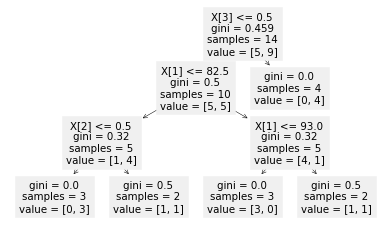

In [ ]:
# Draw decision tree using sklearn
from sklearn import tree
tree.plot_tree(model.fit(X,y))

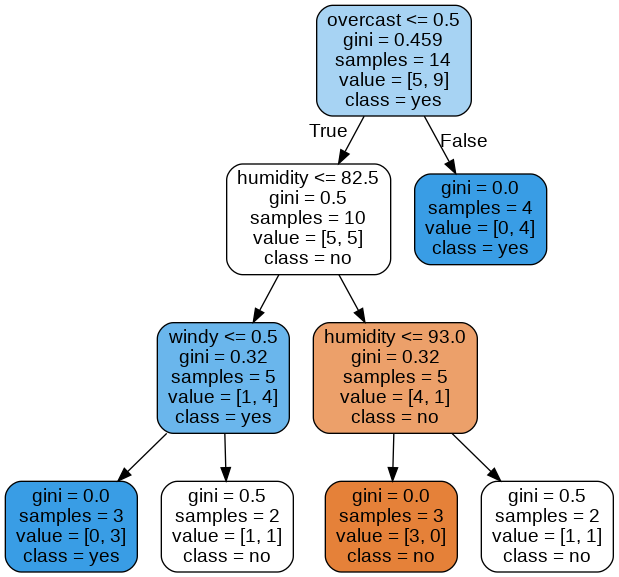

In [ ]:
# Draw decision tree using graphviz
import graphviz
dot_data = tree.export_graphviz(model,
                                # out_file=None,  # draw and show tree on screen
                                out_file='/content/drive/MyDrive/MISM_6212/Code1/Data/decision_trees_weather.dot',
                                feature_names=list(X.columns),
                                # feature_names=['temperature','humidity','windy','overcast','rainy','sunny'],
                                class_names=y.unique(),
                                # class_names=['no','yes'],
                                # impurity=False, # hide gini, entropy, etc.
                                rounded=True,
                                filled=True)

# # Draw and show tree on screen with out_file=None
# graph = graphviz.Source(dot_data)  
# graph

# Draw and save tree with out_file='C:/CoursePython/Programs/outfiles/decision_trees_weather.dot'
graphviz.render('dot', 'png', '/content/drive/MyDrive/MISM_6212/Code1/Data/decision_trees_weather.dot')
graphviz.render('dot', 'jpg', '/content/drive/MyDrive/MISM_6212/Code1/Data/decision_trees_weather.dot')
graphviz.render('dot', 'gif', '/content/drive/MyDrive/MISM_6212/Code1/Data/decision_trees_weather.dot')
graphviz.render('dot', 'pdf', '/content/drive/MyDrive/MISM_6212/Code1/Data/decision_trees_weather.dot')

# Display tree with 'C:/...dot.png'; also works for .jpg and .gif, but not for .pdf
from IPython.display import Image
Image(filename='/content/drive/MyDrive/MISM_6212/Code1/Data/decision_trees_weather.dot.png')

#  
### Evaluate decision tree model using a holdout test set

In [ ]:
# Divide the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('X_train.index:', X_train.index, '\ny_train.index:', y_train.index)
print('X_test.index:', X_test.index, '\ny_test.index:', y_test.index)
# print('X_train:\n', X_train, '\ny_train\n', y_train)
# print('X_test:\n', X_test, '\ny_test\n', y_test)

X_train.index: Int64Index([2, 10, 4, 1, 12, 0, 13, 9, 8, 11, 5], dtype='int64') 
y_train.index: Int64Index([2, 10, 4, 1, 12, 0, 13, 9, 8, 11, 5], dtype='int64')
X_test.index: Int64Index([3, 7, 6], dtype='int64') 
y_test.index: Int64Index([3, 7, 6], dtype='int64')


In [ ]:
# Build decision tree model using training set
model = DecisionTreeClassifier(min_samples_leaf=2, random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, random_state=1)

In [ ]:
# Compute prediction accuracy and confusion matrix for the training set
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_train_pred = model.predict(X_train)
# print('Actual: ', y_train.values)
# print('Predict:', y_train_pred)
confusion_matrix(y_train, y_train_pred).astype('int')
# the default format is in alphabetic order ['no','yes']; rows represent actual, cols represent predicted

array([[4, 0],
       [1, 6]])

In [ ]:
# Customize confusion matrix layout and labeling
cm = pd.DataFrame(confusion_matrix(y_train, y_train_pred, labels=['yes', 'no']), 
                  index=['actual yes', 'actual no'], 
                  columns=['predicted yes', 'predicted no'])
print('Training results:\n' + 'Accuracy:', metrics.accuracy_score(y_train, y_train_pred))
print('Confusion matrix:\n', cm)

Training results:
Accuracy: 0.9090909090909091
Confusion matrix:
             predicted yes  predicted no
actual yes              6             1
actual no               0             4


In [ ]:
# Compute prediction accuracy and confusion matrix for the test set
y_test_pred = model.predict(X_test)
print('Testing results:\n' + 'Accuracy:', metrics.accuracy_score(y_test, y_test_pred))
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred, labels=['yes', 'no']), 
                  index=['actual yes', 'actual no'], 
                  columns=['predicted yes', 'predicted no'])
print('Confusion matrix:\n', cm)

Testing results:
Accuracy: 0.6666666666666666
Confusion matrix:
             predicted yes  predicted no
actual yes              1             1
actual no               0             1


### Evaluate decision tree model using cross validation

In [ ]:
# Evaluate decision tree model using cross validation with for loop

# Divide the data into k folds
from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import KFold
kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Compute prediction accuracy and confusion matrix for the k test sets
num_total_tested = 0
num_correctly_classified = 0   # to calculate average accuracy over k test sets
cm_sum = np.zeros((2,2)) # initialize a 2x2 confusion matrix (cm) for summing up the cm's from all folds
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # print('X_train.index:', X_train.index, '\ny_train.index:', y_train.index)
    print('X_test.index:', X_test.index, '\ny_test.index:', y_test.index)
    # print('X_train:\n', X_train, '\ny_train\n', y_train)
    # print('X_test:\n', X_test, '\ny_test\n', y_test)
    model = DecisionTreeClassifier(min_samples_leaf=5, random_state=1)
    model.fit(X_train, y_train)
    num_total_tested += len(y_test)   # num_total_tested = num_total_tested + len(y_test)
    num_correctly_classified += metrics.accuracy_score(y_test, model.predict(X_test), normalize=False)
    # print(num_total_tested, num_correctly_classified)
    cm = pd.DataFrame(confusion_matrix(y_test, model.predict(X_test), labels=['yes', 'no']), 
                      index=['actual yes', 'actual no'], 
                      columns=['predicted yes', 'predicted no'])
    # print(cm)
    cm_sum += cm

print('\nCross validation test results:\n' + 'Average accuracy:', num_correctly_classified/num_total_tested)
print('Confusion matrix:\n', cm_sum)

X_test.index: Int64Index([0, 2, 3], dtype='int64') 
y_test.index: Int64Index([0, 2, 3], dtype='int64')
X_test.index: Int64Index([1, 4, 6], dtype='int64') 
y_test.index: Int64Index([1, 4, 6], dtype='int64')
X_test.index: Int64Index([5, 8, 9], dtype='int64') 
y_test.index: Int64Index([5, 8, 9], dtype='int64')
X_test.index: Int64Index([7, 10, 11], dtype='int64') 
y_test.index: Int64Index([7, 10, 11], dtype='int64')
X_test.index: Int64Index([12, 13], dtype='int64') 
y_test.index: Int64Index([12, 13], dtype='int64')

Cross validation test results:
Average accuracy: 0.7142857142857143
Confusion matrix:
             predicted yes  predicted no
actual yes            8.0           1.0
actual no             3.0           2.0


In [ ]:
# Evaluate decision tree model using cross validation with cross_val_score
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier(min_samples_leaf=5, random_state=1)
accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Cross validation test results:')
print('accuracy:', accuracy)
print('Average accuracy', accuracy.mean())
# this is calculated by averaging the 5 accuracies, which is different from that based on confusion matrix

Cross validation test results:
accuracy: [0.66666667 1.         0.66666667 0.66666667 0.5       ]
Average accuracy 0.7
